In [21]:
import gym, time
from gym import spaces
import numpy as np
from gym_unbalanced_disk import UnbalancedDisk

def normalization(theta):
    return (theta+np.pi)%(2*np.pi) - np.pi

class UnbalancedDisk_limit(UnbalancedDisk):
    """limit theta to [-pi,pi]"""
    def __init__(self, umax=3., dt = 0.025):
        super(UnbalancedDisk_limit, self).__init__(umax=umax, dt=dt)
        low = [-np.pi,-40.]
        high = [np.pi,40.]
        weight_omega, weight_action = 0.1, 9e-6
        self.observation_space = spaces.Box(low=np.array(low,dtype=np.float32),high=np.array(high,dtype=np.float32),shape=(2,))
        self.reward_fun = lambda self: (-20*(np.pi-np.abs(normalization(self.th)))**2 - weight_omega *self.omega **2 - weight_action*self.u**2).item()

    def get_obs(self):
        self.th_noise = self.th + np.random.normal(loc=0,scale=0.001) #do not edit
        self.omega_noise = self.omega + np.random.normal(loc=0,scale=0.001) #do not edit
        return np.array([normalization(self.th_noise), self.omega_noise]) #change anything here


In [22]:
from stable_baselines3 import SAC
from stable_baselines3.common.evaluation import evaluate_policy

max_episode_steps = 1000
env = UnbalancedDisk_limit(dt=0.025, umax=3.)
env = gym.wrappers.time_limit.TimeLimit(env, max_episode_steps=max_episode_steps)
# env = gym.wrappers.Monitor(env, './SAC_video', force=True)

model = SAC.load('model/SAC_best')
# model = SAC("MlpPolicy", env, learning_rate=0.01, verbose=1)
# model.learn(total_timesteps=15000)
# model.save('model/SAC_15000')


In [24]:
theta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []
frames = []

obs = env.reset()
try:
    for _ in range(500):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        theta.append(obs[0])
        omega.append(obs[1])
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        frames.append(env.render())
        # print(action)
        time.sleep(1/60)
finally:
    env.close()


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

AttributeError: 'bool' object has no attribute 'shape'

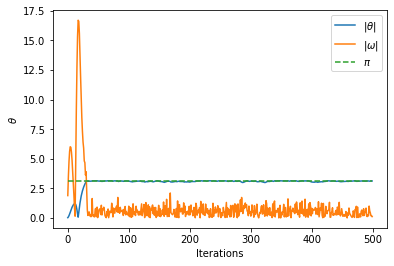

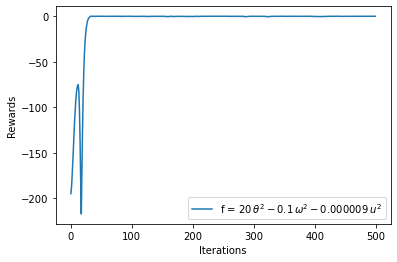

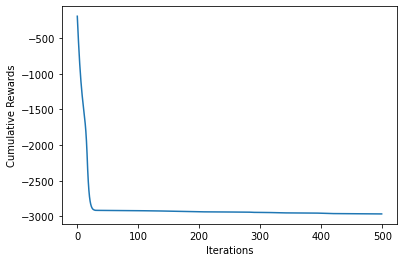

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.abs(theta),label='$|\\theta|$')
plt.plot(np.abs(omega),label='$|\omega|$')
plt.plot([np.pi]*len(theta),'--',label='$\pi$')
plt.xlabel('Iterations')
plt.ylabel(r'$\theta$')
plt.legend()
plt.show()

plt.plot(rewards, label='f = $20\,\\theta^2 - 0.1\,\omega^2 - 0.000009\,u^2$')
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()